## Lab Assignment Three: Extending Logistic Regression 
GROUP MEMBERS:
- **Alex Chen** 
- **Paige Maple** 
- **Sam Valentine**

### Sources
1. ChatGPT (For formatting text and plots)

### Load, Split, and Balance (1.5 points total)

#### Part One (0.5 pts)

In [126]:
import numpy as np
import pandas as pd

# load the dataset and display basic info
df = pd.read_csv("../dataset/acs2017_census_tract_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# remove rows with missing data
df = df.dropna()
# encode strings as integers
df['State'] = le.fit_transform(df['State'])
# drop tractID and county
df = df.drop(['TractId', 'County'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  float64
 12  IncomeErr         72718 non-null  float64
 13  IncomePerCap      72718 non-null  float64
 14  IncomePerCapErr   72718 non-null  float64
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float64
 17

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


We choose to drop the County column because the dataset already includes sufficient geographic information through other variables, such as State and various socioeconomic indicators that indirectly capture regional characteristics. Including County would introduce a high-cardinality categorical feature—there are over 3,000 counties in the United States—which could unnecessarily increase model complexity and lead to overfitting. Moreover, the effect of county-level differences is likely already reflected in demographic and economic features like income, employment, and population composition. Therefore, removing County helps simplify the model while retaining the essential geographic and socioeconomic information needed to predict child poverty rate accurately.

#### Part Two (0.5 pts)

In [128]:
# divide childpoverty into 4 classes using quantization thresholds, higher number means more extreme
df['ChildPovertyClass'] = pd.qcut(df['ChildPoverty'], q=4, labels=[0,1,2,3])

We balanced the dataset using quantile-based binning of the ChildPoverty variable, dividing it into four equal-sized classes. This method keeps all data intact while ensuring each class has a similar number of samples. It avoids the risks of overfitting or data distortion from resampling methods and creates clear, interpretable categories that represent increasing levels of child poverty.

Balancing of the dataset should not be applied to both the training and test sets. The purpose of balancing is to help the model learn equally from all classes during training so that it does not become biased toward the majority class. However, the test set must reflect the real-world distribution of the data, even if that distribution is unbalanced. Altering the test set’s class proportions would lead to misleading evaluation results because the model would be tested on an artificial dataset rather than realistic data. Therefore, the dataset should be balanced only in the training phase, while the test set remains in its original, naturally occurring distribution to provide an unbiased assessment of model performance.

#### Part Three (0.5 pts)

In [129]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing, ensuring all classes are equally represented
X = df.drop(['ChildPoverty', 'ChildPovertyClass'], axis=1)
y = df['ChildPovertyClass']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Pre-processing and Initial Modeling (2.5 points total)

#### Class code for 2-layer perceptron
Requirements: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization

In [130]:
from scipy.special import expit
import sys

class TwoLayerPerceptronBase(object): # base class with vectorized gradient computation
    def __init__(self, n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        onehot = pd.get_dummies(y).values.T
        return onehot

    def _initialize_weights(self):
        W1_num_elems = (self.n_features_ + 1) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1)

        W2_num_elems = (self.n_hidden + 1) * self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)

        return W1, W2

    @staticmethod
    def _sigmoid(z):
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    def _L2_reg(self, lambda_, W1, W2):
        return (lambda_ / 2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    def _cost(self, A3, Y_enc, W1, W2):
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _feedforward(self, X, W1, W2):
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2): 
        V2 = -2 * (Y_enc - A3) * A3 * (1 - A3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        grad2 = V2 @ A2.T
        grad1 = V1[1:, :] @ A1.T
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        return grad1, grad2

    def predict(self, X):
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [131]:
from sklearn.metrics import accuracy_score

class TLPMiniBatch(TwoLayerPerceptronBase): # Inherit from base, added minibatch
    def __init__(self, alpha=0.0, decrease_const=0.1, decrease_iter=10, shuffle=True, minibatches=1, **kwds):
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))

        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))

        for i in range(self.epochs):
            eta = self.eta * self.decrease_const ** (np.floor(i / self.decrease_iter))

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for idx in mini:
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx], self.W1, self.W2)
                cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                mini_cost.append(cost)

                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2)

                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))

        return self

class TLPMiniBatchCrossEntropy(TLPMiniBatch): # added cross entropy loss
    def _cost(self, A3, Y_enc, W1, W2):
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        V2 = (A3 - Y_enc)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        grad2 = V2 @ A2.T
        grad1 = V1[1:, :] @ A1.T
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        return grad1, grad2

class TLPBetterInitial(TLPMiniBatchCrossEntropy): # added proper Glorot initialization
    def _initialize_weights(self):
        init_bound = 4 * np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0

        init_bound = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden + 1))
        W2[:, :1] = 0

        return W1, W2


#### Part One (0.5 pts)

Epoch: 100/100

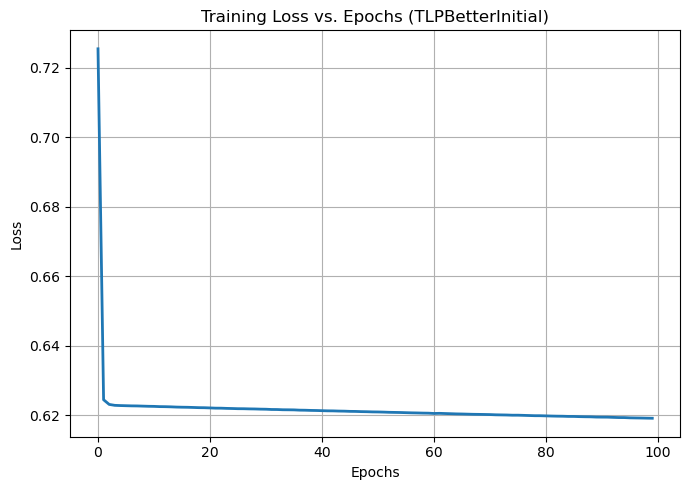

Test Accuracy: 0.252


In [132]:
import matplotlib.pyplot as plt

# Helper function plot Loss vs. Epochs (ensuring convergence) and print accuracy in the end
def plot_training_loss(model, X_test, y_test, title="Training Loss vs. Epochs (TLPBetterInitial)"):
    plt.figure(figsize=(7, 5))
    plt.plot(range(len(model.cost_)), [np.mean(c) for c in model.cost_], linewidth=2)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.3f}")
    
# Store model hyperparameters in a dictionary
hyps = {
    'n_hidden': 30,
    'C': 0.1,
    'epochs': 100,
    'eta': 0.0001,
    'alpha': 0.001,
    'decrease_const': 1,
    'minibatches': 50,
    'shuffle': True,
    'random_state': 42
}

model = TLPBetterInitial(**hyps)
model.fit(X_train.values, y_train.values, print_progress=10)
plot_training_loss(model, X_test, y_test)

#### Part Two (0.5 pts)

Epoch: 100/100

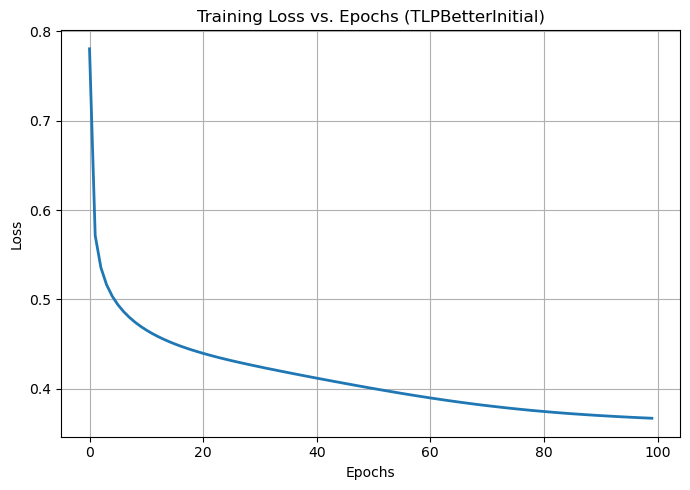

Test Accuracy: 0.710


In [133]:
from sklearn.preprocessing import StandardScaler

# normilize numerical data on df
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# split into train/test set and reevaluate
X = df.drop(['ChildPoverty', 'ChildPovertyClass'], axis=1)
y = df['ChildPovertyClass']

X_train, X_test_norm, y_train, y_test_norm = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model_norm = TLPBetterInitial(**hyps)
model_norm.fit(X_train.values, y_train.values, print_progress=10)
plot_training_loss(model_norm, X_test_norm, y_test_norm)


#### Part Three (0.5 pts)

Epoch: 100/100

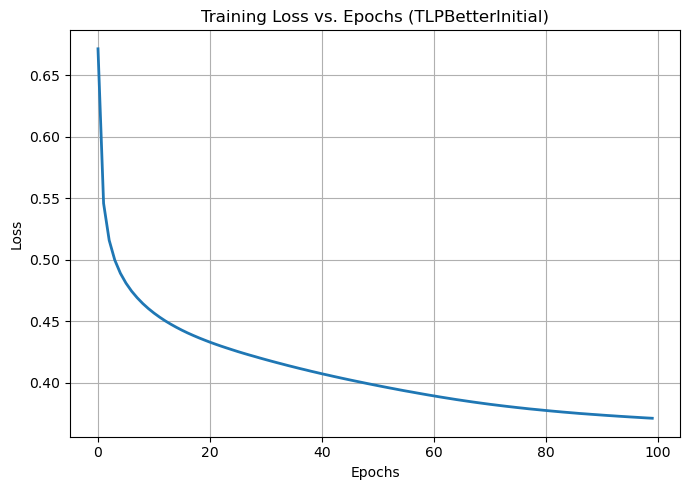

Test Accuracy: 0.702


In [134]:
# normalization is already done at previous cell, given I am using the same dataframe df
# given I already encode state into integer, need to reverse the process before one hot encoding
df_original = pd.read_csv("../dataset/acs2017_census_tract_data.csv")
df['State'] = df_original['State']
# Perform One-hot encoding on categorical data (Given State is the only one)
if 'State' in df.columns: 
    df = pd.get_dummies(df, columns=['State'], drop_first=True)
    
# split into train/test set and reevaluate
X = df.drop(['ChildPoverty', 'ChildPovertyClass'], axis=1)
y = df['ChildPovertyClass']

X_train, X_test_onehot, y_train, y_test_onehot = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = X_train.astype(float)
X_test_onehot = X_test_onehot.astype(float)

model_norm_onehot = TLPBetterInitial(**hyps)
model_norm_onehot.fit(X_train.values, y_train.values, print_progress=10)
plot_training_loss(model_norm_onehot, X_test_onehot, y_test_onehot)

#### Part Four (1 pts)

In [136]:
# Compute predictions for each model
y_pred_base = model.predict(X_test.values)
y_pred_norm = model_norm.predict(X_test_norm.values)
y_pred_onehot = model_norm_onehot.predict(X_test_onehot.values)

# Calculate accuracy for each model
acc_base = accuracy_score(y_test, y_pred_base)
acc_norm = accuracy_score(y_test, y_pred_norm)
acc_onehot = accuracy_score(y_test, y_pred_onehot)

# Display results neatly
print("Model Performance Comparison:")
print(f"Base Model (Unnormalized):           {acc_base:.4f}")
print(f"Normalized Model:                    {acc_norm:.4f}")
print(f"Normalized + One-Hot Encoded Model:  {acc_onehot:.4f}")

Model Performance Comparison:
Base Model (Unnormalized):           0.2522
Normalized Model:                    0.7103
Normalized + One-Hot Encoded Model:  0.7024


The three models show clear performance differences, demonstrating how preprocessing impacts neural network learning. The base (unnormalized) model achieved an accuracy of only 0.2522, indicating that the network struggled to learn meaningful relationships from raw data. Because the input features had very different numerical ranges, the gradient updates during training were uneven, causing unstable learning and poor convergence. Once the features were normalized, the model’s accuracy increased sharply to 0.7103, showing that scaling all numeric inputs to similar ranges helps the optimizer converge faster and more effectively.

The normalized + one-hot encoded model achieved an accuracy of 0.7024, which is very close to the normalized model but slightly lower. This small difference likely arises because the State column was originally label-encoded before being reversed and one-hot encoded, introducing subtle inconsistencies in the feature representation. Additionally, one-hot encoding increases dimensionality and may add noise if the categorical variable contributes little predictive power. Overall, normalization had the greatest positive effect by improving training stability, while one-hot encoding produced only a minor difference because State had limited influence on predicting child poverty levels.

### Modeling (5 points total)

#### Part One (1 pts)

In [ ]:
class TLPThreeLayer(TwoLayerPerceptronBase): 
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter=20, shuffle=True,
                 minibatches=1, **kwds):
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

    def _L2_reg(self, lambda_, W1, W2, W3):
        return (lambda_ / 2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))

    def _cost(self, A4, Y_enc, W1, W2, W3):
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A4) + (1 - Y_enc) * np.log(1 - A4))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term

    def _initialize_weights(self):
        init_bound1 = 4 * np.sqrt(6 / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound1, init_bound1, (self.n_hidden, self.n_features_))
        init_bound2 = 4 * np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound2, init_bound2, (self.n_hidden, self.n_hidden))
        init_bound3 = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W3 = np.random.uniform(-init_bound3, init_bound3, (self.n_output_, self.n_hidden))
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_output_, 1))
        return W1, W2, W3, b1, b2, b3

    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        V3 = A4 - Y_enc
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

    def fit(self, X, y, print_progress=False, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []
        for i in range(self.epochs):
            eta = self.eta * self.decrease_const**(np.floor(i / self.decrease_iter))
            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()
            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
                cost = self._cost(A4, Y_enc[:, idx], self.W1, self.W2, self.W3)
                mini_cost.append(cost)
                gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3)
                self.grad_w1_[i] = np.abs(gradW1).mean()
                self.grad_w2_[i] = np.abs(gradW2).mean()
                self.grad_w3_[i] = np.abs(gradW3).mean()
                rho_W1, rho_W2, rho_W3 = eta * gradW1, eta * gradW2, eta * gradW3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))
        return self

    def predict(self, X):
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

Epoch: 100/100

Three-Layer MLP Accuracy: 0.7182


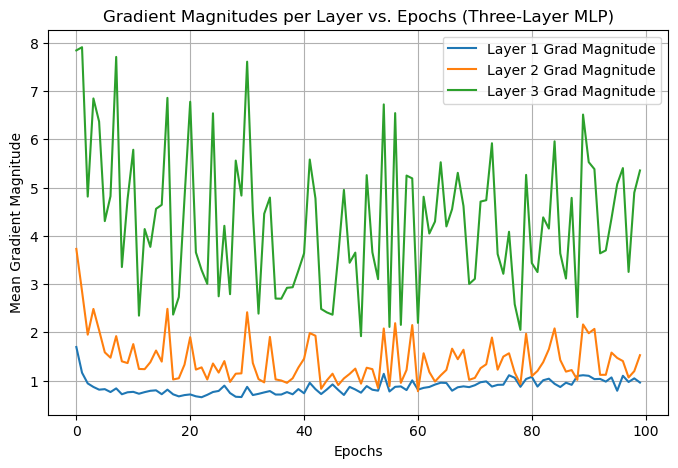

In [143]:
# helper function for quantifying performace (show accuracy) and graph the magnitudes for each layer versus the number of epochs.
def evaluate_model(model, X_test, y_test, model_name="MLP"):
    y_pred = model.predict(X_test.values)
    acc = accuracy_score(y_test.values, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")

    plt.figure(figsize=(8, 5))
    layer = 1
    while hasattr(model, f'grad_w{layer}_'):
        grads = getattr(model, f'grad_w{layer}_')
        plt.plot(range(model.epochs), grads, label=f"Layer {layer} Grad Magnitude")
        layer += 1

    plt.xlabel("Epochs")
    plt.ylabel("Mean Gradient Magnitude")
    plt.title(f"Gradient Magnitudes per Layer vs. Epochs ({model_name})")
    plt.legend()
    plt.grid(True)
    plt.show()
# evaluate three_layer MLP
three_layer_MLP = TLPThreeLayer(**hyps)
three_layer_MLP.fit(X_train.values, y_train.values, print_progress=10)
evaluate_model(three_layer_MLP, X_test_onehot, y_test_onehot, model_name="Three-Layer MLP")

#### Part Two (1 pts)

In [144]:
class TLPFourLayer(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter=20, shuffle=True,
                 minibatches=1, **kwds):
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

    def _L2_reg(self, lambda_, W1, W2, W3, W4):
        return (lambda_ / 2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2))

    def _cost(self, A5, Y_enc, W1, W2, W3, W4):
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A5) + (1 - Y_enc) * np.log(1 - A5))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term

    def _initialize_weights(self):
        init_bound1 = 4 * np.sqrt(6 / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound1, init_bound1, (self.n_hidden, self.n_features_))
        init_bound2 = 4 * np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound2, init_bound2, (self.n_hidden, self.n_hidden))
        init_bound3 = 4 * np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W3 = np.random.uniform(-init_bound3, init_bound3, (self.n_hidden, self.n_hidden))
        init_bound4 = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W4 = np.random.uniform(-init_bound4, init_bound4, (self.n_output_, self.n_hidden))
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_hidden, 1))
        b4 = np.zeros((self.n_output_, 1))
        return W1, W2, W3, W4, b1, b2, b3, b4

    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        V4 = A5 - Y_enc
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

    def fit(self, X, y, print_progress=False, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []
        for i in range(self.epochs):
            eta = self.eta * self.decrease_const ** (np.floor(i / self.decrease_iter))
            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()
            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx],
                                                                       self.W1, self.W2, self.W3, self.W4,
                                                                       self.b1, self.b2, self.b3, self.b4)
                cost = self._cost(A5, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4)
                mini_cost.append(cost)
                gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                    Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4)
                self.grad_w1_[i] = np.abs(gradW1).mean()
                self.grad_w2_[i] = np.abs(gradW2).mean()
                self.grad_w3_[i] = np.abs(gradW3).mean()
                self.grad_w4_[i] = np.abs(gradW4).mean()
                rho_W1, rho_W2, rho_W3, rho_W4 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))
        return self

    def predict(self, X):
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

Epoch: 100/100

Four-Layer MLP Accuracy: 0.7222


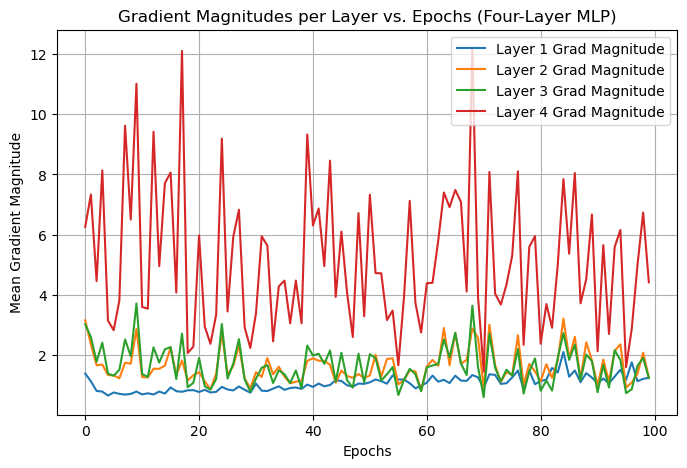

In [145]:
# evaluate four_layer MLP
four_layer_MLP = TLPFourLayer(**hyps)
four_layer_MLP.fit(X_train.values, y_train.values, print_progress=10)
evaluate_model(four_layer_MLP, X_test_onehot, y_test_onehot, model_name="Four-Layer MLP")

#### Part Three (1 pts)

In [146]:
class TLPFiveLayer(TLPFourLayer):
    def _L2_reg(self, lambda_, W1, W2, W3, W4, W5):
        return (lambda_ / 2.0) * np.sqrt(
            np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) +
            np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2)
        )

    def _cost(self, A6, Y_enc, W1, W2, W3, W4, W5):
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A6) + (1 - Y_enc) * np.log(1 - A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _initialize_weights(self):
        init_bound1 = 4 * np.sqrt(6 / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound1, init_bound1, (self.n_hidden, self.n_features_))
        init_bound2 = 4 * np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound2, init_bound2, (self.n_hidden, self.n_hidden))
        init_bound3 = 4 * np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W3 = np.random.uniform(-init_bound3, init_bound3, (self.n_hidden, self.n_hidden))
        init_bound4 = 4 * np.sqrt(6 / (self.n_hidden + self.n_hidden))
        W4 = np.random.uniform(-init_bound4, init_bound4, (self.n_hidden, self.n_hidden))
        init_bound5 = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W5 = np.random.uniform(-init_bound5, init_bound5, (self.n_output_, self.n_hidden))
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_hidden, 1))
        b4 = np.zeros((self.n_hidden, 1))
        b5 = np.zeros((self.n_output_, 1))
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        V5 = A6 - Y_enc
        V4 = A5 * (1 - A5) * (W5.T @ V5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C
        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5

    def fit(self, X, y, print_progress=False, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []
        for i in range(self.epochs):
            eta = self.eta * self.decrease_const ** (np.floor(i / self.decrease_iter))
            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()
            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5,
                    self.b1, self.b2, self.b3, self.b4, self.b5)
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost)
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6,
                    Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                    Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)
                self.grad_w1_[i] = np.abs(gradW1).mean()
                self.grad_w2_[i] = np.abs(gradW2).mean()
                self.grad_w3_[i] = np.abs(gradW3).mean()
                self.grad_w4_[i] = np.abs(gradW4).mean()
                self.grad_w5_[i] = np.abs(gradW5).mean()
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                self.b5 -= eta * gradb5
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))
        return self

    def predict(self, X):
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(
            X, self.W1, self.W2, self.W3, self.W4, self.W5,
            self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

Epoch: 100/100

Five-Layer MLP Accuracy: 0.7235


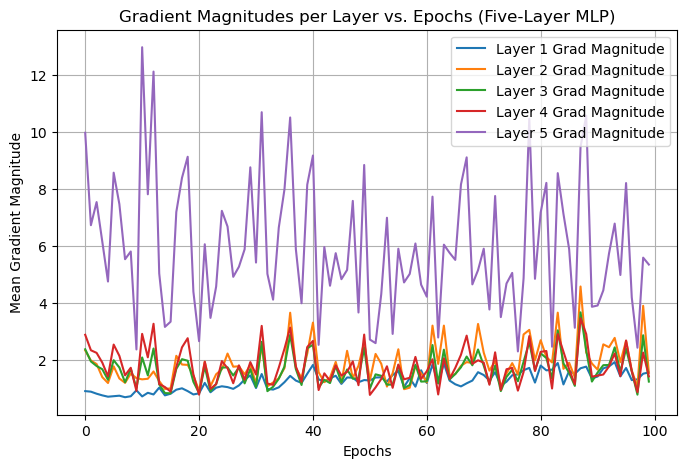

In [147]:
# evaluate four_layer MLP
five_layer_MLP = TLPFiveLayer(**hyps)
five_layer_MLP.fit(X_train.values, y_train.values, print_progress=10)
evaluate_model(five_layer_MLP, X_test_onehot, y_test_onehot, model_name="Five-Layer MLP")

#### Part Four (2 pts)

### Exceptional Work (1 points total)
One idea (required for 7000 level students):  Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance compared to other methods.  